In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [4]:
from datetime import timedelta
import datetime 
import os

from fileUtils import read_file_properties_v2,find_filesv2,get_labeled_exif,list_files
from fileUtils import get_audio,str2timestamp,query_audio

import pandas as pd
from pathlib import Path



In [5]:
# !ls ../../data/

In [6]:
# file_properties_df=pd.read_pickle("../../data/realdata_v2No_stinchcomb.pkl")
# file_properties_df2=pd.read_pickle("../../data/stinchcomb_dataV1.pkl")
file_properties_df=pd.read_pickle("../../data/allFields_dataV3.pkl")
dataPoints=[]

In [8]:
def main(location,start_time,lenght):
    
    end_time=None  # or datetime object

    #how to name the file 
    file_name="original2"

    # if there is no recording in given timestamp, it searches before and after, 
    # buffer is how far to look in seconds
    buffer=1800

    # where to save audio files
    tmp_folder="/home/enis/projects/nna/data/tmp/"

    output=query_audio(location,start_time,end_time,length,buffer,file_properties_df,file_name,display_flag=True,save=True,tmp_folder=tmp_folder)
    print(output.iloc[0].timestamp,"---",output.iloc[0].durationSec)
    timestamp=datetime.datetime.strptime(start_time, '%Y-%m-%d_%H:%M:%S')
    buffer=datetime.timedelta(minutes=5)

    imgTime,imgPath=findPhoto(location,timestamp,imgOnlyDate,buffer=buffer)

    if imgTime!=-1:
        display(Image(imgPath,width=600))
    dataPoint="'{},{},{},{}',".format(location,start_time,length,imgPath)
    print(dataPoint)


In [9]:
# display(Image(imgPath,w))

original2_exact_2019-06-05_00:00:00
2019-06-04 23:46:02 --- 4438.0


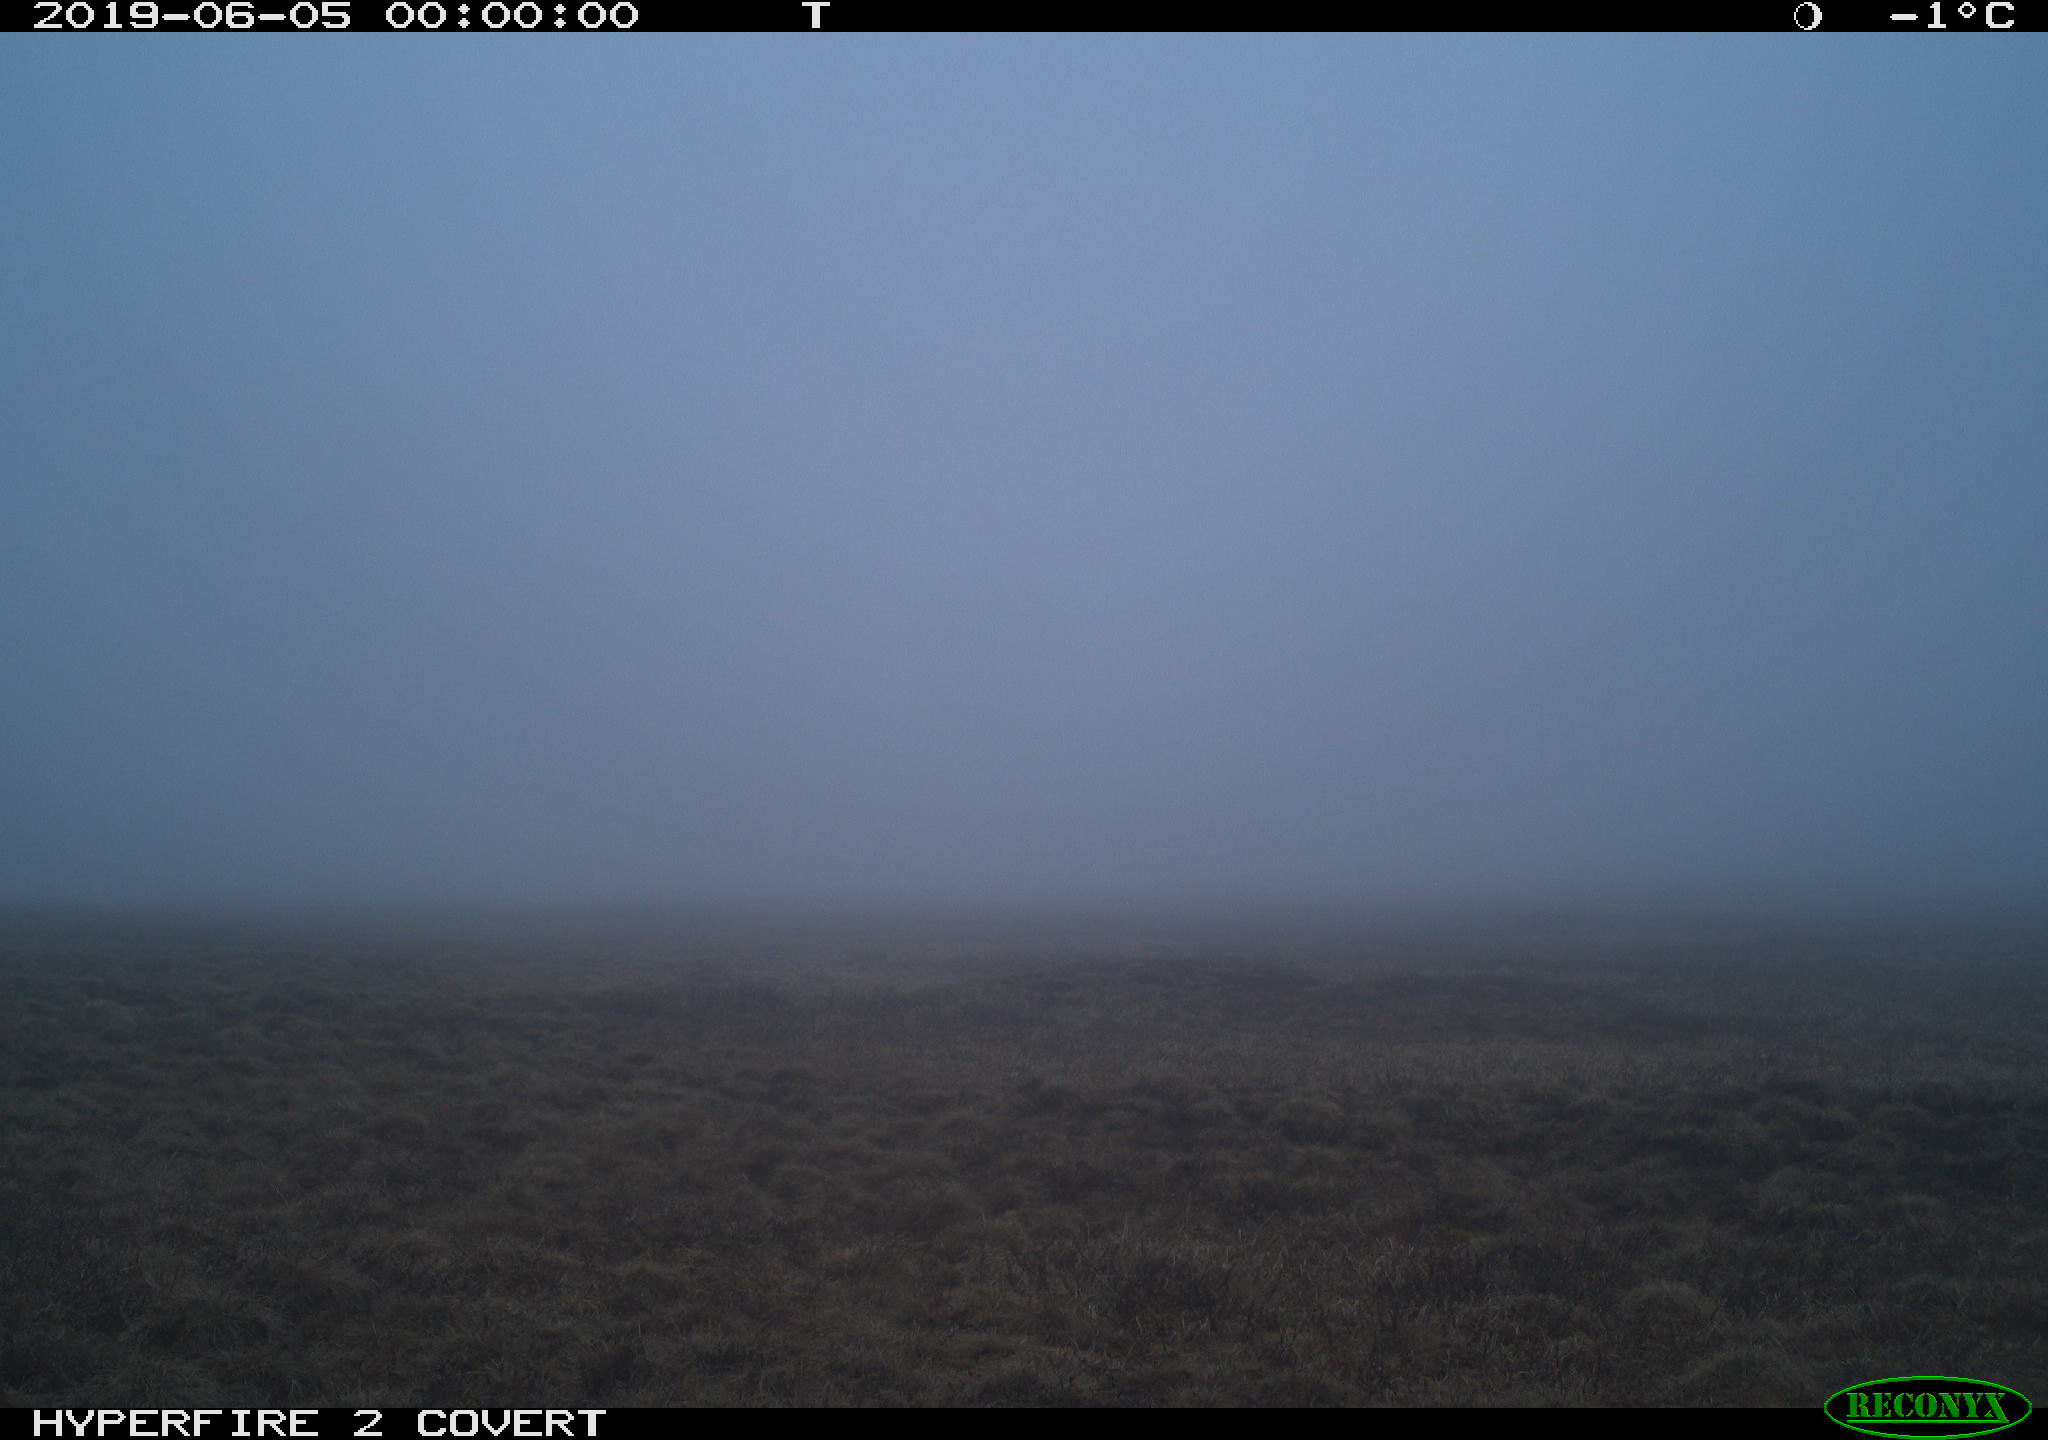

'35,2019-06-05_00:00:00,30,/tank/data/nna/cameraTrap/anwr/35/2019/100RECNX/RCNX9025.JPG',


In [74]:
# location ID, examples: AR03', '15', 'SINP07', '24', 'AR08'     file_properties_df["site_id"].unique()
location="35"
# raw_embed_name="/scratch/enis/data/nna/real/prudhoe/26/2019/S4A10255_20190507_073000_vgg/S4A10255_20190507_073000_embeddings000.npy"

start_time='2019-06-05_00:00:00' # YYYY-MM-DD_HH:MM:SS or datetime object
length=30 # in seconds , if set end_time is IGNORED
main(location,start_time,length)


In [64]:

myNotes=\
"""
There is a bird (maybe raven), rocks are moving around
Just a little bit of wind, nothing else
Just wind for 5 minutes
Bird sounds, there is a strong sound mixed with wind,nothing on the image(ice is melted)
Bird sounds, engine like sound mixed with wind,nothing on the image(ice is melted)
There is a storm, no visual, before midnight and after all day, wind and cable is true, bu there are no birds. Wind sounds like some animal screaming
Predictions says there are birds, but it is just wind
There is a static sound that model thinks it is running water, that is kind of my mistake, there are birds so correctly predicted
There is a plane -predicted(low)-, no water wrong prediction, there are few bird sounds
Around midnight there are many water bird sounds
I can here both kinds of birds, -predicted-
I would label this as rain, but it might be just thin cables
I hear waterbirds and wind but prediction is aircraft,songbird wind
"""
dataPoints=\
['31,2019-05-04_06:30:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX0264.JPG',
 '31,2019-05-04_09:30:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX0303.JPG',
 '31,2019-05-04_14:30:00,300,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX0363.JPG',
 '31,2019-05-23_14:30:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX6072.JPG',
 '31,2019-05-23_15:31:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX6084.JPG',
 '31,2019-05-06_23:50:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX1138.JPG',
 "31,2019-05-09_08:00:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX1890.JPG",
 '31,2019-05-10_08:00:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX2178.JPG',
 '31,2019-05-15_15:59:10,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX3768.JPG',
 '31,2019-05-15_00:23:10,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX3527.JPG',
 '31,2019-06-10_23:50:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/101RECNX/RCNX1375.JPG',
 '31,2019-06-16_22:25:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/101RECNX/RCNX3998.JPG',
 '31,2019-06-05_01:00:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX9657.JPG',
]
print(len(myNotes.split("\n"))-2,len(dataPoints))

13 13


In [18]:
import shutil
shutil.rmtree(tmp_folder)

In [58]:
print(dataPoint)


31,2019-05-09_08:00:00,30,/tank/data/nna/cameraTrap/anwr/31/2019/100RECNX/RCNX1890.JPG


In [9]:
#file_properties_df[file_properties_df["site_id"]=="40"].sort_values(by=['timestamp'])[100:110]

In [ ]:
file_properties_df[file_properties_df.site_id==""]

In [ ]:
file_properties_df2[file_properties_df2.site_id==""]

In [11]:
from bisect import bisect_left
from IPython.display import display, Image
import pickle

with open("../../data/imgOnlyDateV1.pkl", 'rb') as f:
    imgOnlyDate=pickle.load(f)
def findPhoto(location,timestamp,imgOnlyDate,buffer=datetime.timedelta(seconds=1)):
    index=bisect_left(imgOnlyDate[location], (timestamp,""))
    if index==len(imgOnlyDate[location]):
        index-=1

    if index==-1:
        index=1

    left=imgOnlyDate[location][index-1]
    right=imgOnlyDate[location][index]
#     print(index)
#     print(left[0],right[0])

    if timestamp==left[0]:
        return left
    if timestamp==right[0]:
        return right
    leftDistance=abs(timestamp-left[0])
    rightDistance=abs(right[0]-timestamp)
#     print(leftDistance,rightDistance)
    if leftDistance<=rightDistance and leftDistance<=buffer:
        print(leftDistance)
        return left
    if rightDistance<=buffer:
        print(rightDistance)
        return right
    return (-1,-1)



0
2019-07-03 18:11:55 2019-05-02 15:14:09
92 days, 17:05:55 30 days, 14:08:09
